In [2]:
import pandas as pd

# Load dataset
dataset = "Mall_Customers.csv"
data = pd.read_csv(dataset)

# Select numeric features
X1 = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [3]:
# Step 1: Import the class
from sklearn.cluster import KMeans

# Step 2: Initialize instance with hyperparameters
kmeans = KMeans(
    n_clusters=3,  # Number of clusters (we must decide)
    init='k-means++',  # Use K-means++ initialization (default)
    # Other initialization techniques available in documentation
)

# Step 3: Fit model to data
kmeans.fit(X1)

# Step 4: Predict clusters
labels = kmeans.predict(X1)  # Can predict on same data for clustering
# Note: Unlike supervised learning, predicting on same data is safe
# We're finding groupings, not overfitting to a solution

In [4]:
# For large datasets - use mini-batch K-Means
from sklearn.cluster import MiniBatchKMeans

# Randomly selects batches for faster computation
# Similar to K-Means but with smaller batches
# Helps speed up algorithm for large datasets

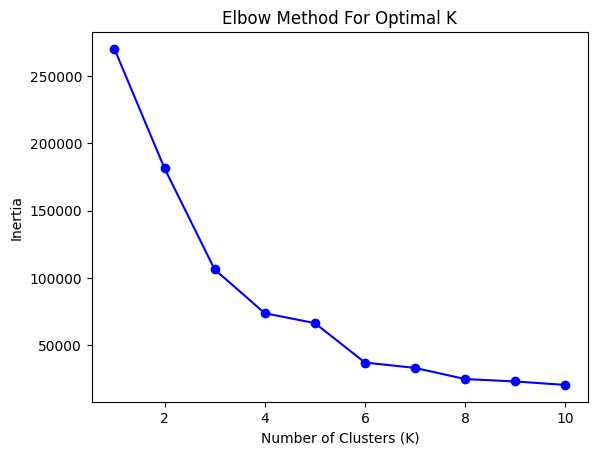

In [5]:
# Initialize empty list for inertia values
inertias = []

# Define range of K values to test
K_range = range(1, 11)  # Test K from 1 to 10

# Fit K-Means for each K value
for K in K_range:
    # Initialize K-Means with current K
    kmeans = KMeans(n_clusters=K, init='k-means++')
    
    # Fit to data
    kmeans.fit(X1)
    
    # Get inertia attribute after fitting
    # kmeans.inertia_ contains the inertia value
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
import matplotlib.pyplot as plt

plt.plot(K_range, inertias, 'bo-')  # K values on x-axis, inertias on y-axis
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

# Look for the "elbow" in the plot to determine optimal K